# Collaborative Tennis

---

In this notebook, we're training two agents to keep passing the ball between each other without dropping it. 

We use the Unity ML-Agents environment. This is performed as part of a project for the course [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions (README) to double-check that you have installed the necessary packages. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from unityagents import UnityEnvironment

from collaborative_agent import CollaborativeAgent
from train import train

%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Next, we will start the environment. **Note that this will only work on a Linux (x64) machine.**

In [2]:
env = UnityEnvironment(file_name="../unity_environment/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


You should now see a Unity visualization window just spawned. If you get any pop-ups on the application not responding, just click "Wait" or ignore the message. 

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# Reset the environment.
env_info = env.reset(train_mode=False)[brain_name]

# Number of agents.
num_agents = len(env_info.agents)
print(f'Number of agents: {num_agents}')

# Size of action. 
action_size = brain.vector_action_space_size
print(f'Number of possible actions: {action_size}')

# Size of state. 
states = env_info.vector_observations
state_size = states.shape[1]
print(f'Number of possible states: {state_size}')

Number of agents: 2
Number of possible actions: 2
Number of possible states: 24


### 3. Take Random Actions in the Environment

Let's confirm that we have everything set up and the visualization works. 

Here, we will watch the agents' (tennis raquets) performance, as they select actions (uniformly) at random with each time step.  A window should pop up that allows you to observe the agents, as they move through the environment.  

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score from episode {}: {}'.format(i, np.max(scores)))

Score from episode 1: 0.0
Score from episode 2: 0.0
Score from episode 3: 0.09000000171363354
Score from episode 4: 0.0
Score from episode 5: 0.0


### 4. Let's train the agents!

Let's construct our collaborative agent, that contains both our individual agents, from the `CollaborativeAgent` class. 

In [6]:
agent = CollaborativeAgent(num_agents=num_agents, observation_size=state_size, action_size=action_size, device=device, seed=0)

Let's begin training. 

In [7]:
NUM_EPISODES = 5000                    # Maximum number of training episodes.
MAX_TIME_IN_EPISODE = 1000             # Maximum number of timesteps per episode.
SCORE_ACCEPTANCE_THRESHOLD = 0.5       # The average score of all agents for the task to be considered successful. 
MAXSCORE_ACCEPTANCE_THRESHOLD = 1.0    # The average score of all agents for the task to stop training. 

In [8]:
scores = train(env, 
               brain_name, 
               agent, 
               NUM_EPISODES, 
               MAX_TIME_IN_EPISODE,
               SCORE_ACCEPTANCE_THRESHOLD, 
               MAXSCORE_ACCEPTANCE_THRESHOLD)

Episode 100	Average Score: 0.003000
Episode 200	Average Score: 0.000000
Episode 300	Average Score: 0.000000
Episode 400	Average Score: 0.001000
Episode 500	Average Score: 0.001000
Episode 600	Average Score: 0.001000
Episode 700	Average Score: 0.001000
Episode 800	Average Score: 0.002900
Episode 900	Average Score: 0.003000
Episode 1000	Average Score: 0.000000
Episode 1100	Average Score: 0.013000
Episode 1200	Average Score: 0.005000
Episode 1300	Average Score: 0.037000
Episode 1400	Average Score: 0.046000
Episode 1500	Average Score: 0.028800
Episode 1600	Average Score: 0.031400
Episode 1700	Average Score: 0.018000
Episode 1800	Average Score: 0.066900
Episode 1900	Average Score: 0.096900
Episode 2000	Average Score: 0.058000
Episode 2100	Average Score: 0.067000
Episode 2200	Average Score: 0.064800
Episode 2300	Average Score: 0.050900
Episode 2400	Average Score: 0.067900
Episode 2500	Average Score: 0.069800
Episode 2600	Average Score: 0.074900
Episode 2700	Average Score: 0.062900
Episode 28

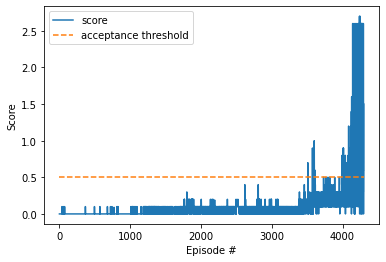

In [9]:
# Plot the scores over learning time. 

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='score')
plt.plot([0, len(scores)], [SCORE_ACCEPTANCE_THRESHOLD, SCORE_ACCEPTANCE_THRESHOLD], 
         linestyle='dashed', 
         label='acceptance threshold')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### 5. Test our agent's performance. 

In [10]:
# Load the weights from file. 
for idx in range(num_agents): 
    agent.agents[idx].actor_local.load_state_dict(torch.load(f'../model/trained_actor_{idx}.pt'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print(f'Total score this episode: {round(np.mean(scores),3)}')

Total score this episode: 1.995


In [11]:
env.close()